1 There are 62 images in the class kareen_kapoor:
2 There are 63 images in the class unknown:
3 There are 59 images in the class randeep:
4 There are 41 images in the class ranbeer:
5 There are 56 images in the class john_abrham:
6 There are 54 images in the class kangana:
7 There are 69 images in the class salman_khan:
8 There are 2766 images in the class manjeet:
9 There are 39 images in the class sanjay_dutt:
10 There are 19 images in the class karishma_kapoor:
11 There are 52 images in the class jacqlin:
12 There are 24 images in the class juhi_chavala:
13 There are 57 images in the class irfan_khan:
14 There are 305 images in the class sanjeev:
15 There are 45 images in the class ritesh_deshmukh:
16 There are 33 images in the class saif_ali_khan:
17 There are 47 images in the class kajol:
(3791, 160, 160, 3) (3791,)


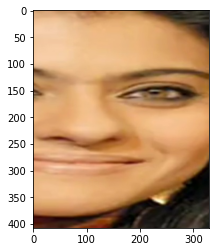

In [4]:
#Method to get the array of face data(trainX) and it's labels(trainY)
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
#from mtcnn.mtcnn import MTCNN


def extract_image(image):
  img1 = Image.open(image)            #open the image
  img1 = img1.convert('RGB')          #convert the image to RGB format 
  pixels = asarray(img1)              #convert the image to numpy array
  #detector = MTCNN()                  #assign the MTCNN detector
  #f = detector.detect_faces(pixels)
  #fetching the (x,y)co-ordinate and (width-->w, height-->h) of the image
  #x1,y1,w,h = f[0]['box']             
  #x1, y1 = abs(x1), abs(y1)
  #x2 = abs(x1+w)
  #y2 = abs(y1+h)
  #locate the co-ordinates of face in the image
  #store_face = pixels[y1:y2,x1:x2]
  plt.imshow(pixels)
  image1 = Image.fromarray(pixels,'RGB')    #convert the numpy array to object
  image1 = image1.resize((160,160))             #resize the image
  face_array = asarray(image1)                  #image to array
  return face_array

#Method to fetch the face
def load_faces(directory):
  face = []
  i=1
  for filename in listdir(directory):
    path = directory + filename
    faces = extract_image(path)
    face.append(faces)
  return face

def load_dataset(directory):
  x, y = [],[]
  i=1
  for subdir in listdir(directory):
    path = directory + subdir + '/'
    #load all faces in subdirectory
    faces = load_faces(path)
    #create labels
    labels = [subdir for _ in range(len(faces))]
    #summarize
    print("%d There are %d images in the class %s:"%(i,len(faces),subdir))
    x.extend(faces)
    y.extend(labels)
    i=i+1
  return asarray(x),asarray(y)  


#load the datasets
trainX,trainY = load_dataset('data/')
print(trainX.shape,trainY.shape)
#compress the data
savez_compressed('_data.npz',trainX,trainY)

In [6]:
from numpy import load
from numpy import asarray
from numpy import expand_dims
from numpy import savez_compressed
from numpy import reshape
from keras.models import load_model 

#Generalize the data and extract the embeddings
def extract_embeddings(model,face_pixels):
  face_pixels = face_pixels.astype('float32')  #convert the entire data to float32(base)
  mean = face_pixels.mean()                    #evaluate the mean of the data
  std  = face_pixels.std()                     #evaluate the standard deviation of the data
  face_pixels = (face_pixels - mean)/std       
  samples = expand_dims(face_pixels,axis=0)    #expand the dimension of data 
  yhat = model.predict(samples)
  return yhat[0]

#load the compressed dataset and facenet keras model
data = load('_data.npz')
trainx, trainy = data['arr_0'],data['arr_1']
print(trainx.shape, trainy.shape)
model = load_model('facenet_keras.h5')

#get the face embeddings
new_trainx = list()
for train_pixels in trainx:
  embeddings = extract_embeddings(model,train_pixels)
  new_trainx.append(embeddings)
new_trainx = asarray(new_trainx)             #convert the embeddings into numpy array
print(new_trainx.shape)

#compress the 128 embeddings of each face 
savez_compressed('_data_embeddings.npz',new_trainx,trainy)

Using TensorFlow backend.
/home/manjeet/anaconda3/envs/embedding/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/manjeet/anaconda3/envs/embedding/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/manjeet/anaconda3/envs/embedding/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ma

(3791, 160, 160, 3) (3791,)
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/home/manjeet/anaconda3/envs/embedding/lib/python3.6/site-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(3791, 128)


In [9]:
!pip install --ignore-installed --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:04
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.3 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 4.8 MB/s eta 0:00:00m eta 0:0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.9/195.9 kB 3.1 MB/s eta 0:00:004.4 MB/s eta 0:00:01
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 3.4 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 1.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.5 MB/s eta 0:00:004.3 MB/s eta 0:00:01
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498447 sha256=ae3ae1b1a523cd2c6f5747c50e7254cb2de0cf85539ea4df569b39358bd5a845
  Stored in directory: /home/manjeet/.cache/pip/wheels/cd/5a/a8/88d7a5c8d35f5a5e9cddec186ce76d5e303e0462d8a6c827bb
Successfully built jax


In [2]:
!pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 1.1.5 requires pytz>=2017.2, which is not installed.
